In [2]:
import pandas as pd

# Load the dataset
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to identify the date columns
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# Convert 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Display the DataFrame info to confirm the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
# Check data types of each column
column_data_types = df.dtypes

# Count the number of rows in the dataset
total_rows = len(df)

# Check for missing values in the dataset
missing_values = df.isnull().sum()

column_data_types, total_rows, missing_values

(datetime      datetime64[ns]
 season                 int64
 holiday                int64
 workingday             int64
 weather                int64
 temp                 float64
 atemp                float64
 humidity               int64
 windspeed            float64
 casual                 int64
 registered             int64
 count                  int64
 dtype: object,
 10886,
 datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 dtype: int64)

In [5]:
# Extract year, month, day of the week, and hour from the 'datetime' column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['datetime'].dt.hour

# Display the first few rows to confirm the new columns
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [6]:
# Rename the values in the 'season' column
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_mapping)

# Display the first few rows to confirm the changes
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [7]:
# Group by year and calculate the sum of 'casual' and 'registered' bikes
total_bikes_by_year = df.groupby('year')[['casual', 'registered']].sum()
total_bikes_by_year

,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


In [8]:
# Group by season and calculate the mean of the 'count' column
mean_hourly_rentals_by_season = df.groupby('season')['count'].mean()

# Identify the season with the highest mean
highest_mean_season = mean_hourly_rentals_by_season.idxmax()

mean_hourly_rentals_by_season, highest_mean_season

(season
 fall      234.417124
 spring    116.343261
 summer    215.251372
 winter    198.988296
 Name: count, dtype: float64,
 'fall')

In [9]:
# Filter the data for 2011 and 2012
data_2011 = df[df['year'] == 2011]
data_2012 = df[df['year'] == 2012]

# Group by month and sum up the total number of bikes rented for each year
total_bikes_by_month_2011 = data_2011.groupby('month')['count'].sum()
total_bikes_by_month_2012 = data_2012.groupby('month')['count'].sum()

# Identify the months with the highest and lowest totals for each year
highest_month_2011 = total_bikes_by_month_2011.idxmax()
lowest_month_2011 = total_bikes_by_month_2011.idxmin()
highest_month_2012 = total_bikes_by_month_2012.idxmax()
lowest_month_2012 = total_bikes_by_month_2012.idxmin()

(total_bikes_by_month_2011, highest_month_2011, lowest_month_2011, 
 total_bikes_by_month_2012, highest_month_2012, lowest_month_2012)

(month
 1     23552
 2     32844
 3     38735
 4     50517
 5     79713
 6     89776
 7     92848
 8     83296
 9     79104
 10    79522
 11    70889
 12    61183
 Name: count, dtype: int64,
 7,
 1,
 month
 1      56332
 2      66269
 3      94766
 4     116885
 5     120434
 6     130957
 7     121769
 8     130220
 9     133425
 10    127912
 11    105551
 12     98977
 Name: count, dtype: int64,
 9,
 1)

In [10]:
# Group by weather and calculate the mean of the 'count' column
mean_hourly_rentals_by_weather = df.groupby('weather')['count'].mean()

# Identify the weather type with the highest and lowest mean
highest_mean_weather = mean_hourly_rentals_by_weather.idxmax()
lowest_mean_weather = mean_hourly_rentals_by_weather.idxmin()

mean_hourly_rentals_by_weather, highest_mean_weather, lowest_mean_weather


(weather
 1    205.236791
 2    178.955540
 3    118.846333
 4    164.000000
 Name: count, dtype: float64,
 1,
 3)

In [11]:
# Calculate the correlation of all numerical columns with the 'count' column
correlation_with_count = df.corr()['count'].sort_values(ascending=False)

# Identify the column with the highest correlation with 'count' (excluding 'count' itself)
highest_correlation_column = correlation_with_count.drop('count').idxmax()

correlation_with_count, highest_correlation_column

/var/folders/jf/6r6j2hzd7z5gpvb7kplv39sw0000gn/T/ipykernel_37515/4187138574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_count = df.corr()['count'].sort_values(ascending=False)


(count          1.000000
 registered     0.970948
 casual         0.690414
 hour           0.400601
 temp           0.394454
 atemp          0.389784
 year           0.260403
 month          0.166862
 windspeed      0.101369
 workingday     0.011594
 day_of_week   -0.002283
 holiday       -0.005393
 weather       -0.128655
 humidity      -0.317371
 Name: count, dtype: float64,
 'registered')

In [12]:
# Define a function to categorize hours into day periods
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

# Apply the function to the 'hour' column to create the 'day_period' column
df['day_period'] = df['hour'].apply(categorize_hour)

# Display the first few rows to confirm the new column
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour,day_period
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,night
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,night
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,night
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,night
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,night


In [13]:
# Generate a pivot table
pivot_table = df.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')

pivot_table

workingday,0,1
day_period,,
afternoon,371.022989,266.196141
evening,180.182759,251.054662
morning,157.772414,234.353763
night,44.052083,16.217582


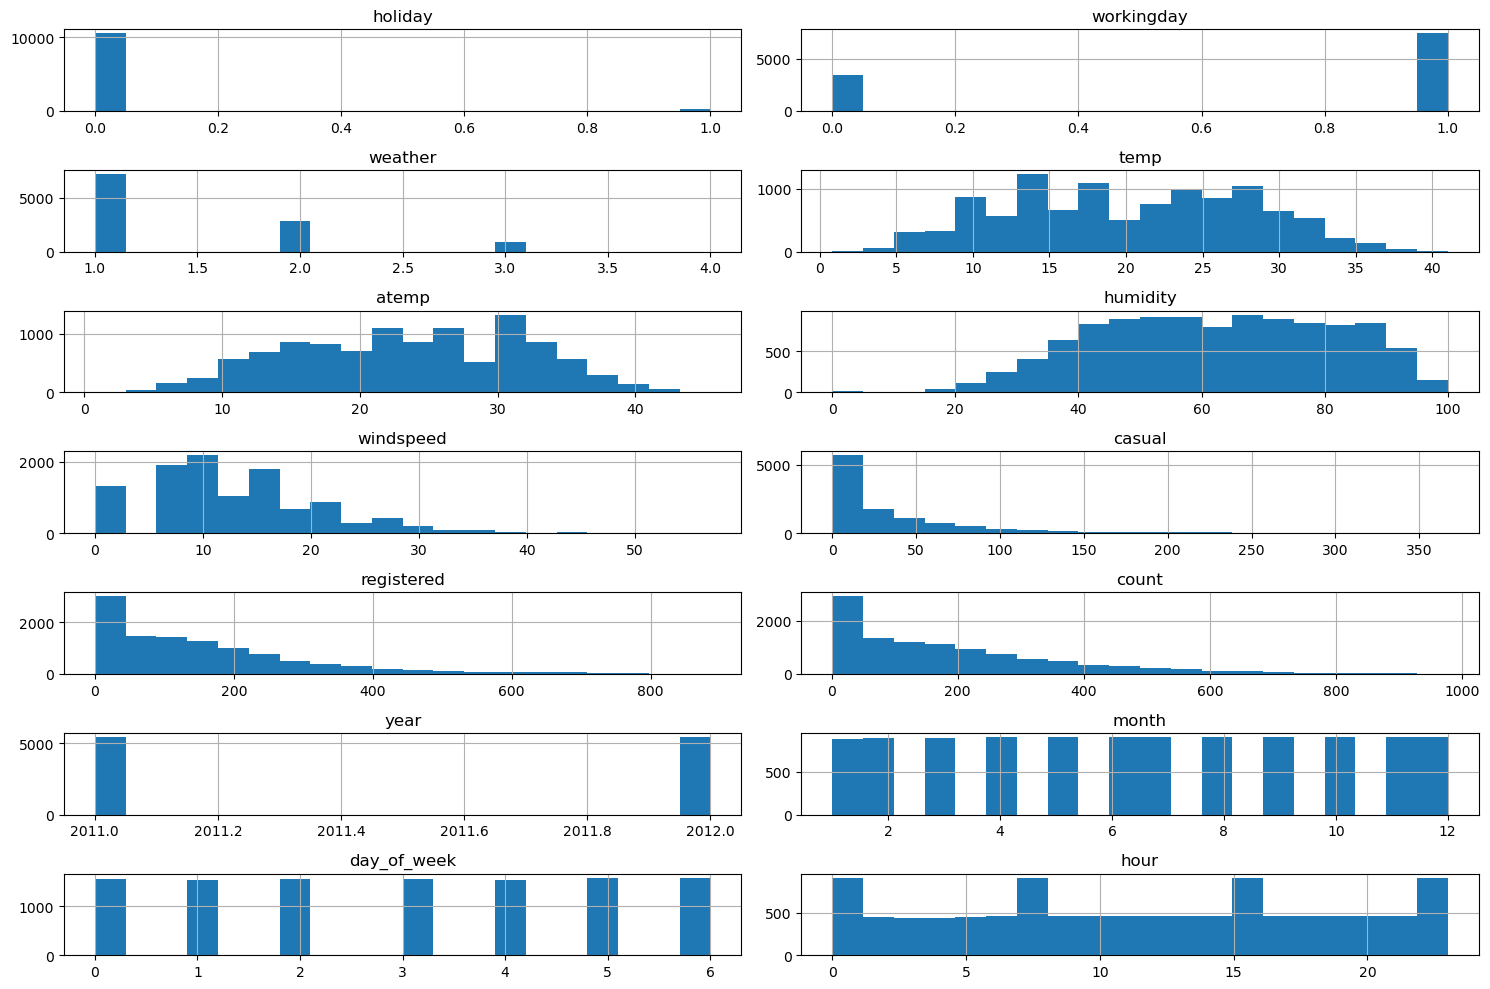

In [14]:
import matplotlib.pyplot as plt

# Selecting only the numerical columns for histogram plots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 2 + len(numerical_columns) % 2, 2, i + 1)
    df[column].hist(bins=20)
    plt.title(column)
    plt.tight_layout()

plt.show()


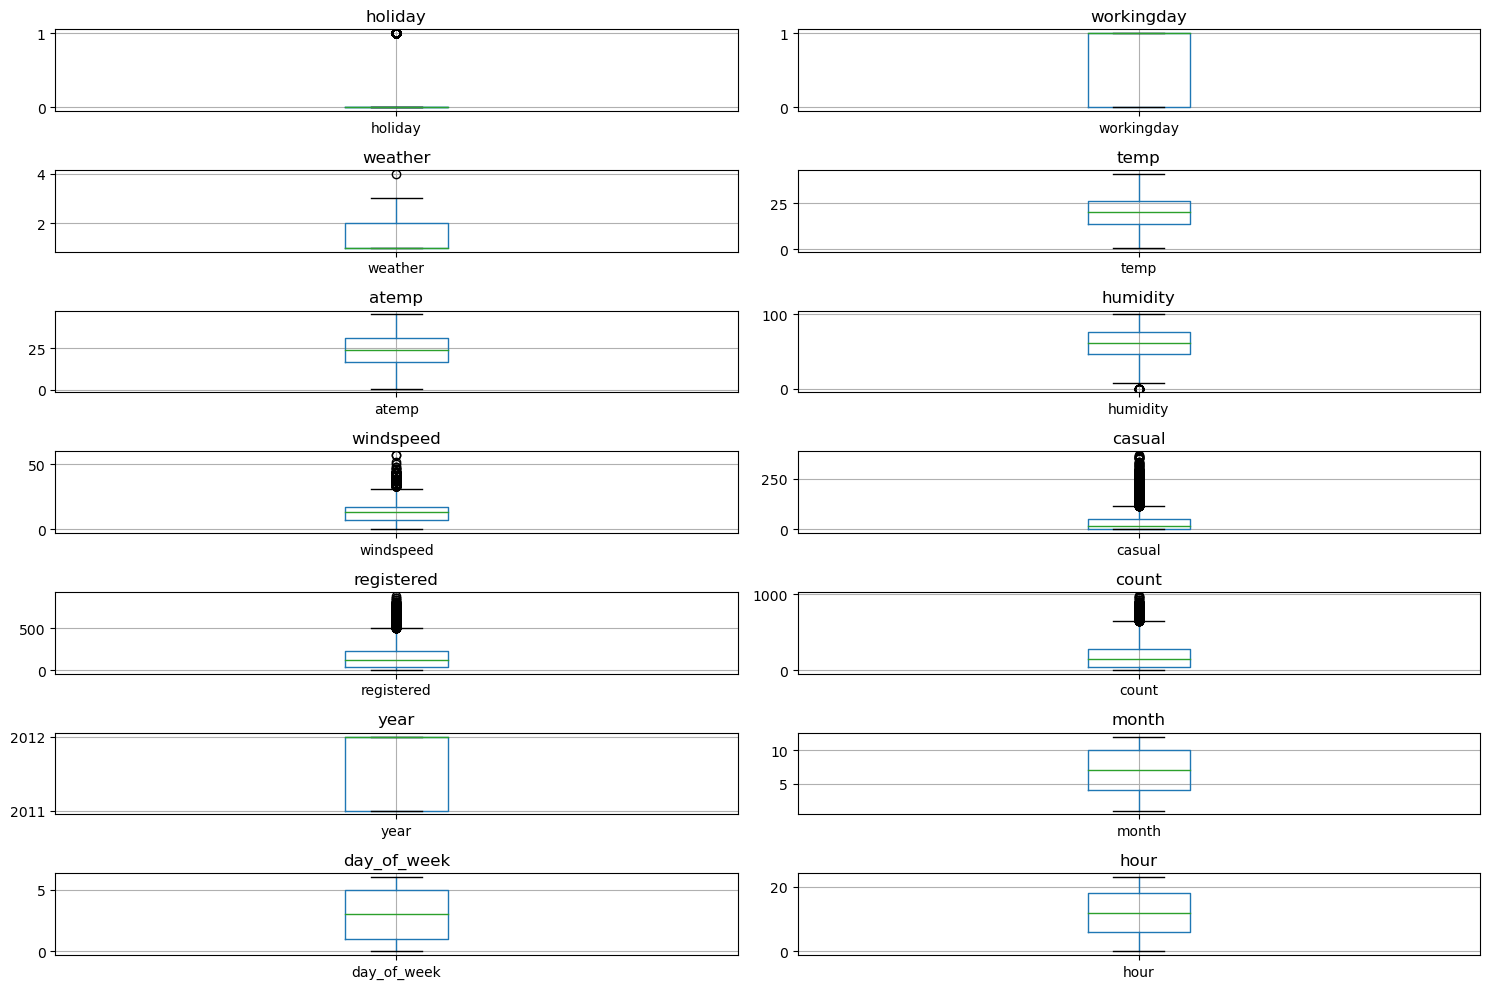

In [15]:
# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 2 + len(numerical_columns) % 2, 2, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.tight_layout()

plt.show()


<Figure size 1200x600 with 0 Axes>

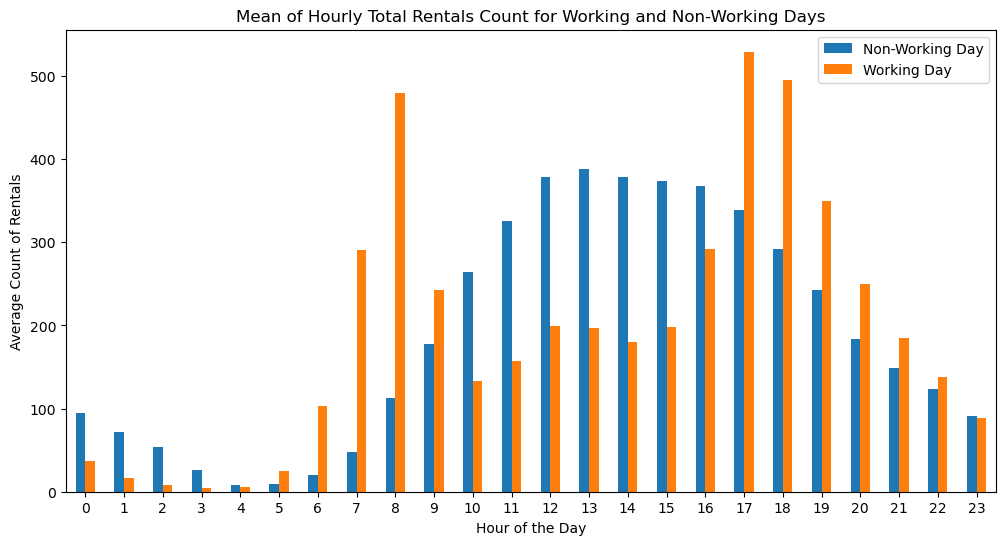

In [16]:
# Group by 'hour' and 'workingday', and calculate the mean of 'count'
mean_hourly_rentals = df.groupby(['hour', 'workingday'])['count'].mean().unstack()

# Plotting the means
plt.figure(figsize=(12, 6))
mean_hourly_rentals.plot(kind='bar', figsize=(12,6))
plt.title('Mean of Hourly Total Rentals Count for Working and Non-Working Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals')
plt.xticks(rotation=0)
plt.legend(['Non-Working Day', 'Working Day'])
plt.show()


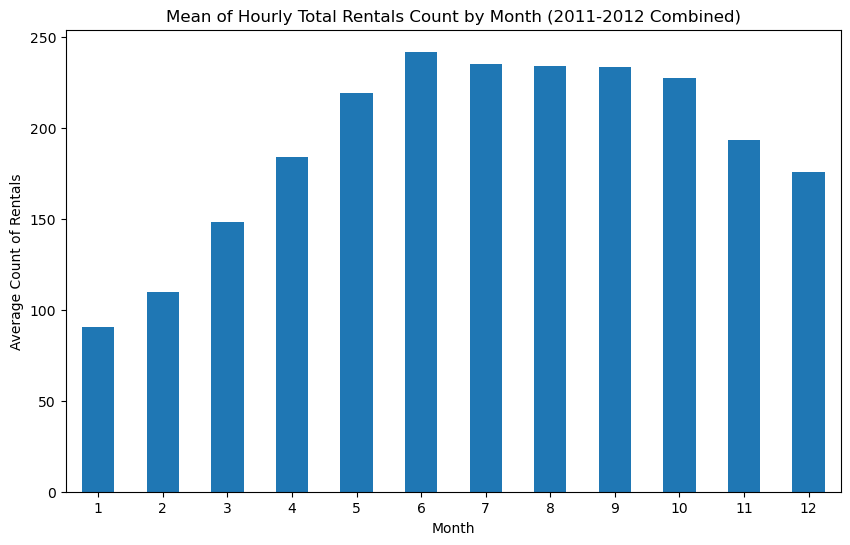

In [17]:
# Group by 'month' and calculate the mean of 'count'
mean_monthly_rentals = df.groupby('month')['count'].mean()

# Plotting the means
plt.figure(figsize=(10, 6))
mean_monthly_rentals.plot(kind='bar')
plt.title('Mean of Hourly Total Rentals Count by Month (2011-2012 Combined)')
plt.xlabel('Month')
plt.ylabel('Average Count of Rentals')
plt.xticks(rotation=0)
plt.show()


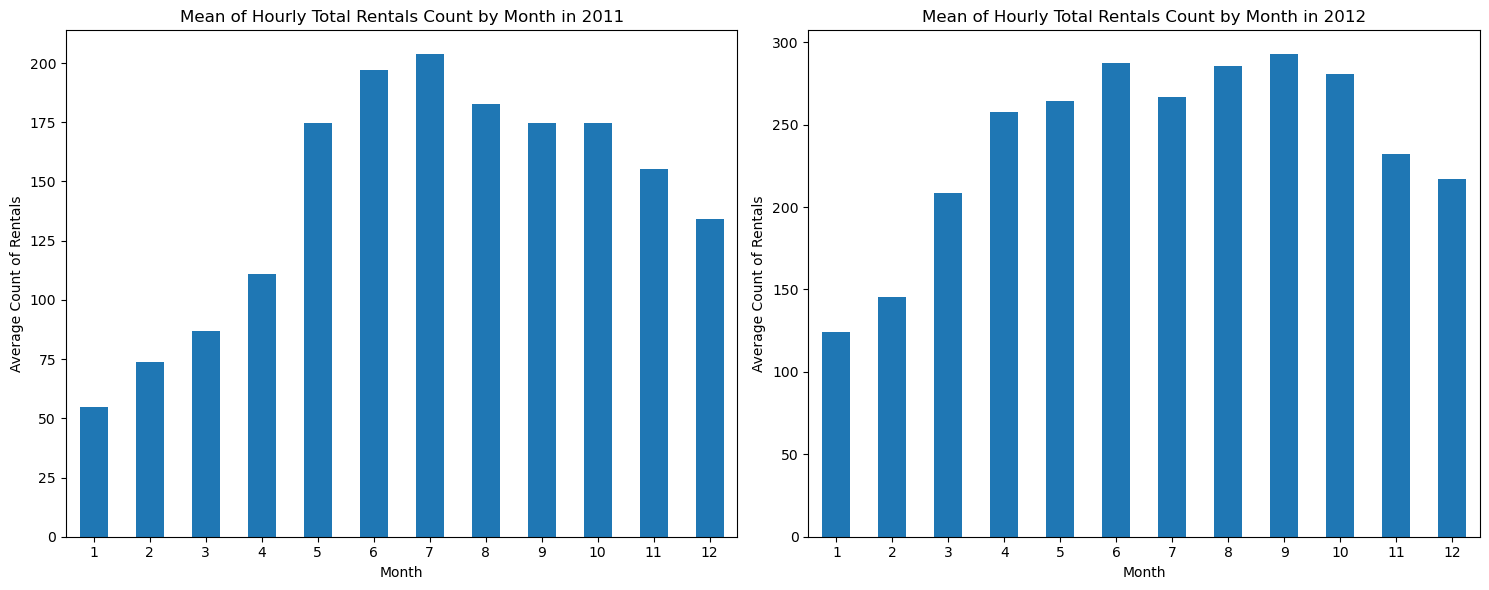

In [18]:
# Group by 'year' and 'month' and calculate the mean of 'count'
mean_monthly_rentals_by_year = df.groupby(['year', 'month'])['count'].mean().unstack(0)

# Plotting the means in a multi-panel figure
plt.figure(figsize=(15, 6))

# Plot for 2011
plt.subplot(1, 2, 1)
mean_monthly_rentals_by_year[2011].plot(kind='bar')
plt.title('Mean of Hourly Total Rentals Count by Month in 2011')
plt.xlabel('Month')
plt.ylabel('Average Count of Rentals')
plt.xticks(rotation=0)

# Plot for 2012
plt.subplot(1, 2, 2)
mean_monthly_rentals_by_year[2012].plot(kind='bar')
plt.title('Mean of Hourly Total Rentals Count by Month in 2012')
plt.xlabel('Month')
plt.ylabel('Average Count of Rentals')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


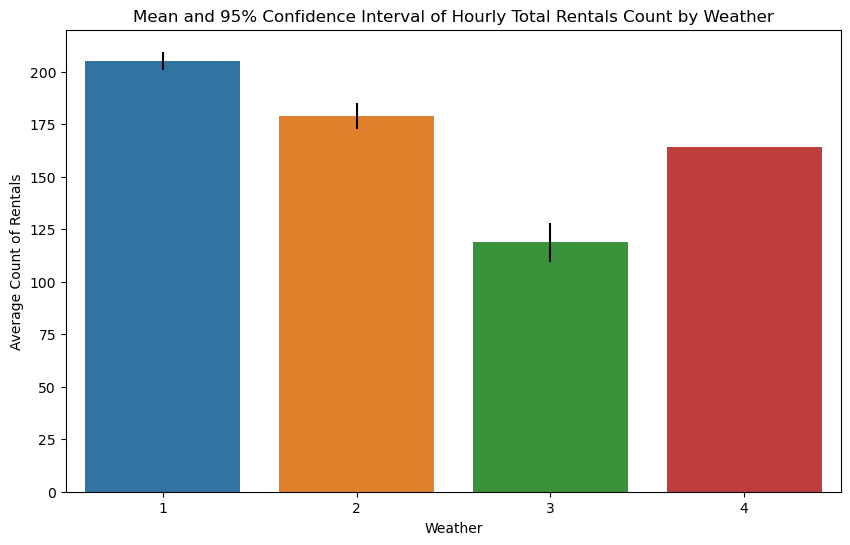

In [19]:
import numpy as np
import seaborn as sns

# Calculate the mean and standard error for each weather category
mean_counts = df.groupby('weather')['count'].mean()
std_error = df.groupby('weather')['count'].sem()

# Calculate the 95% confidence intervals
confidence_interval = 1.96 * std_error

# Create a DataFrame for plotting
weather_stats = pd.DataFrame({'mean': mean_counts, 'lower': mean_counts - confidence_interval, 'upper': mean_counts + confidence_interval})
weather_stats.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='mean', yerr=confidence_interval, data=weather_stats)
plt.title('Mean and 95% Confidence Interval of Hourly Total Rentals Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Count of Rentals')
plt.show()


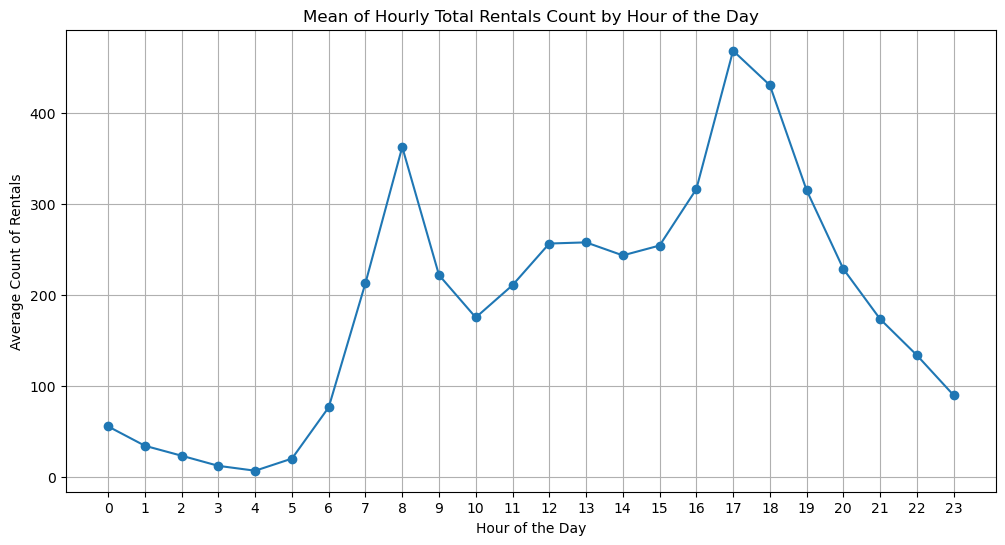

In [20]:
# Group by 'hour' and calculate the mean of 'count'
mean_hourly_rentals = df.groupby('hour')['count'].mean()

# Plotting the means
plt.figure(figsize=(12, 6))
mean_hourly_rentals.plot(kind='line', marker='o')
plt.title('Mean of Hourly Total Rentals Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

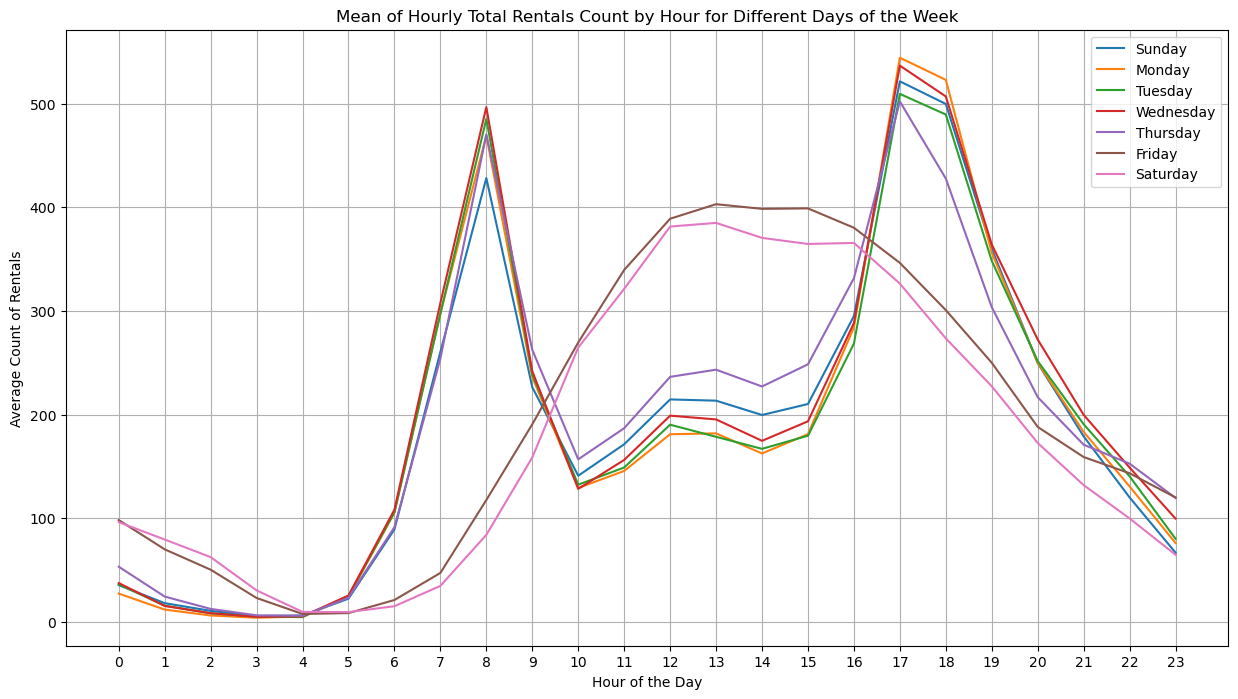

In [21]:
# Group by 'day_of_week' and 'hour' and calculate the mean of 'count'
mean_hourly_rentals_by_day = df.groupby(['day_of_week', 'hour'])['count'].mean().unstack(0)

# Plotting the means
plt.figure(figsize=(15, 8))
for day in range(7):
    plt.plot(mean_hourly_rentals_by_day[day], label=f'Day {day}')

plt.title('Mean of Hourly Total Rentals Count by Hour for Different Days of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals')
plt.xticks(range(0, 24))
plt.legend(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.grid(True)
plt.show()


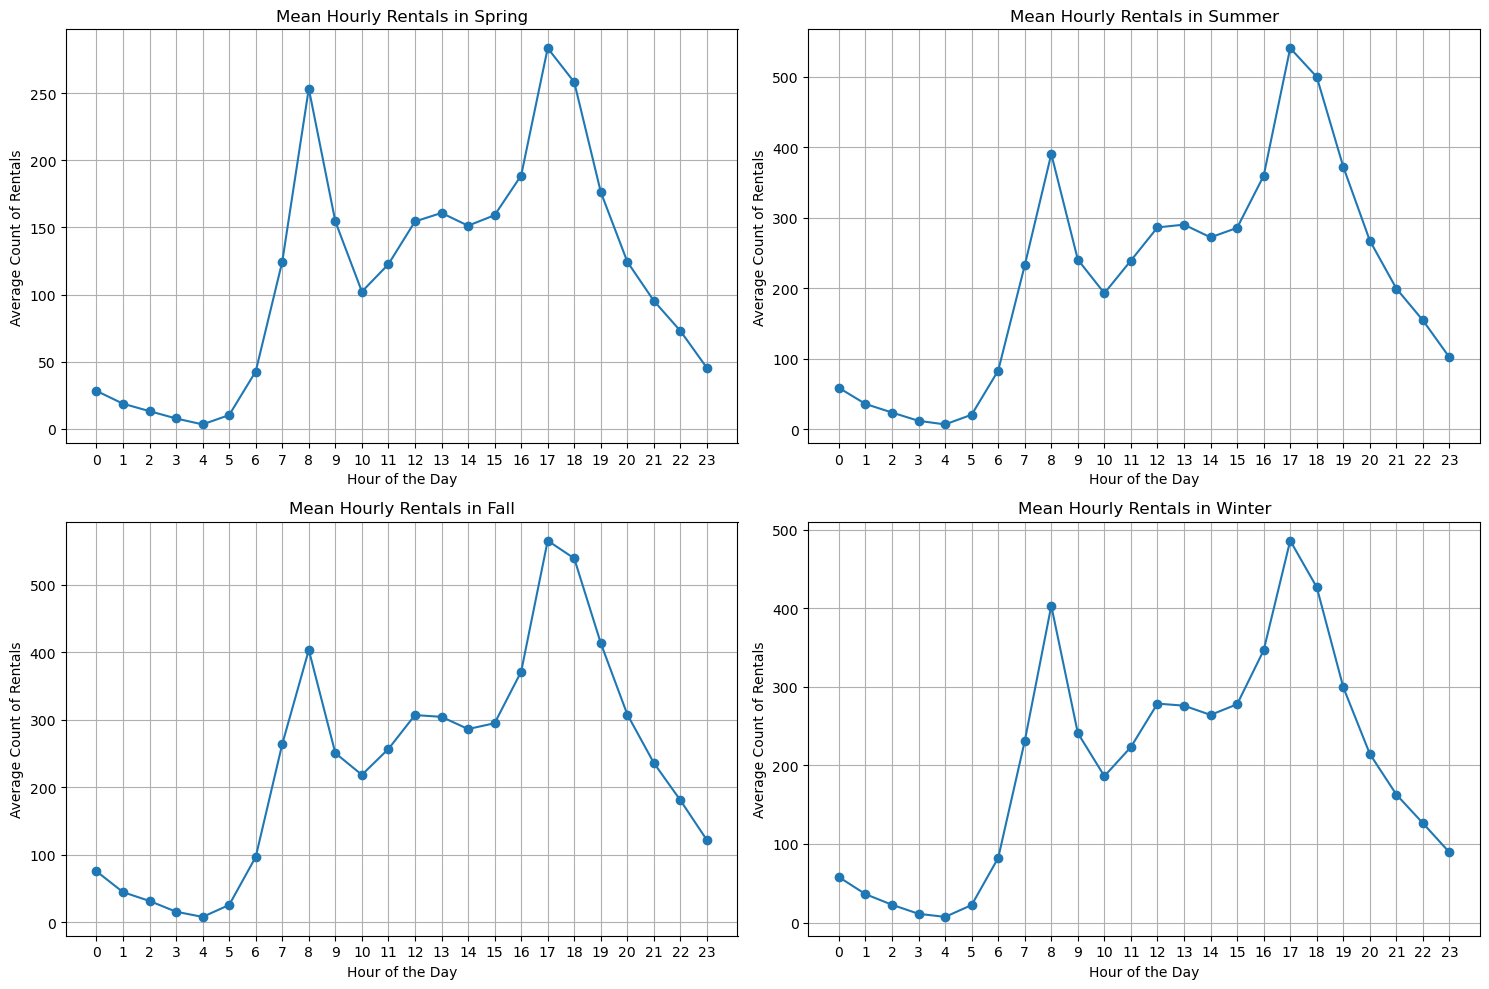

In [22]:
# Group by 'season' and 'hour' and calculate the mean of 'count'
mean_hourly_rentals_by_season = df.groupby(['season', 'hour'])['count'].mean().unstack(0)

# Plotting the means in a multi-panel figure
plt.figure(figsize=(15, 10))

# Plot for each season
seasons = ['spring', 'summer', 'fall', 'winter']
for i, season in enumerate(seasons):
    plt.subplot(2, 2, i + 1)
    mean_hourly_rentals_by_season[season].plot(kind='line', marker='o')
    plt.title(f'Mean Hourly Rentals in {season.title()}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Count of Rentals')
    plt.xticks(range(0, 24))
    plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

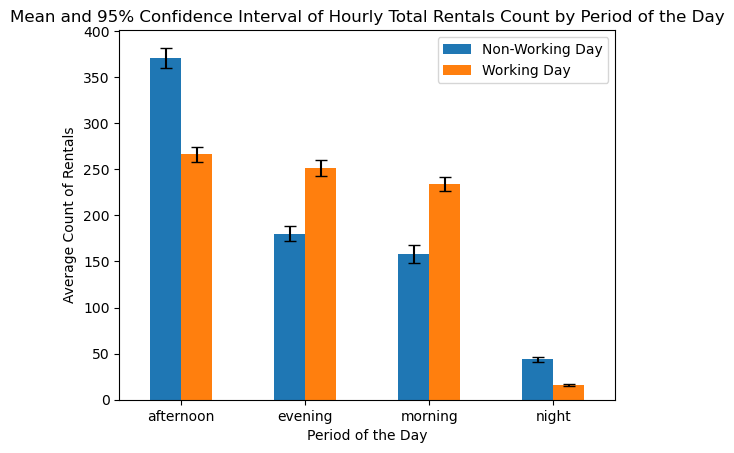

In [23]:
# Group by 'day_period' and 'workingday', and calculate the mean and standard error
mean_counts_by_period = df.groupby(['day_period', 'workingday'])['count'].mean().unstack()
std_error_by_period = df.groupby(['day_period', 'workingday'])['count'].sem().unstack()

# Calculate the 95% confidence intervals
confidence_interval_by_period = 1.96 * std_error_by_period

# Plotting the means with confidence intervals
plt.figure(figsize=(12, 6))
mean_counts_by_period.plot(kind='bar', yerr=confidence_interval_by_period, capsize=4)
plt.title('Mean and 95% Confidence Interval of Hourly Total Rentals Count by Period of the Day')
plt.xlabel('Period of the Day')
plt.ylabel('Average Count of Rentals')
plt.xticks(rotation=0)
plt.legend(['Non-Working Day', 'Working Day'])
plt.show()


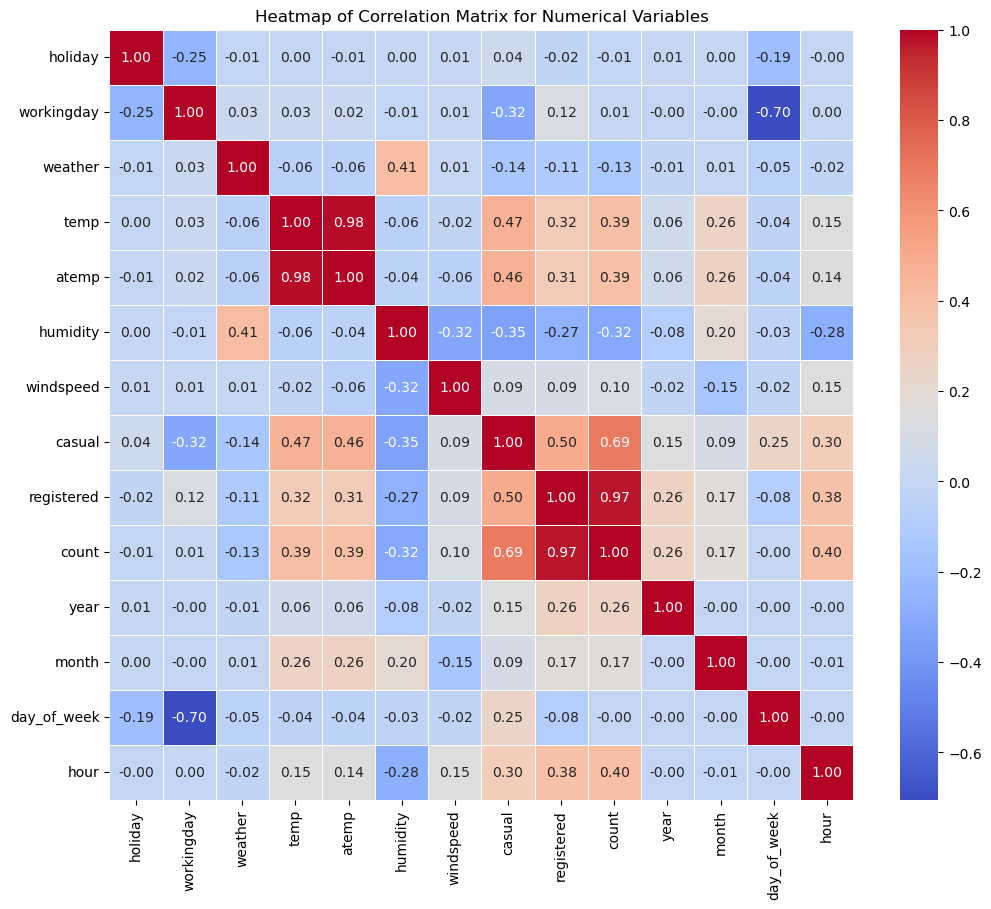

In [24]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Numerical Variables')
plt.show()
